# Exploratory Data Analysis on Sales

### The folowing are table of contents:

- Data validation and cleaning:
  - Validating data type, field content,etc.
  - Cleaning errors
- Exploratory Analysis:  
  - Include two different visualizations showing single variables only to demonstrate the characteristics of data  
  - Include visualizations showing two or more variables to represent the relationship between features
  - Describing findings
- Making recommendations

### Data Validation and Cleaning

- To begin we have to import all the python library that will be usefull, at least the onse we need to begin with.
- Then import our dataset
- Then take a view of our fields
- If there's any action needed for cleaning then we proceed, if not we leave them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')
plt.figure(figsize=(10,6))
sns.set_palette(['gray'])


<Figure size 1000x600 with 0 Axes>

In [2]:
df = pd.read_csv('product_sales_data.csv')

In [3]:
df.info()
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [4]:
# I want to know how many na or null values are there in the dataset
df_null_count = df.isna().sum().sum()
print("dataset null:",df_null_count)

# I want to know how many na or null values are there in revenue column
revenue_nll_count = df["revenue"].isna().sum()
print("revenue null:",revenue_nll_count)

dataset null: 1074
revenue null: 1074


### From the above outputs:
- We could see that our data contains 15000 rows and 8 columns.
- That the dataset has 1074 null and the null values are in the revenue column. 
- We could see that the revenue column only have 13926 numeric values and 1074 null



### My quick jugement of this:
For me, becuse the revenue column values is one of the most important columns here, we have a few options here, 1. We could either replace the null values with the revenue mean, median or mode values, 2. We could delete all the null rows.

I would prefare to work with a genuine data rather than fabricating figures to fill in the null.
I have decided to drop the null revenue rows.

In [5]:
# Delete rows where 'revenue' column is null
df.dropna(subset=['revenue'], inplace=True)

In [6]:
# I want to check again if the null rows has been dropped
revenue_nll_count = df["revenue"].isna().sum()
print("revenue null:",revenue_nll_count)

revenue null: 0


In [7]:
# Print the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [8]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


<AxesSubplot: >

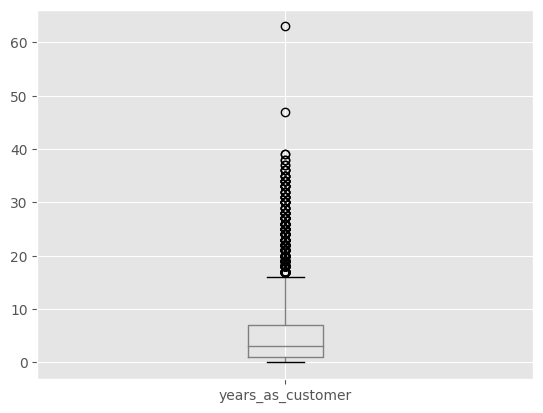

In [9]:
df.boxplot(column='years_as_customer')

In [10]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [11]:
# Filter the DataFrame based on the condition 'years_as_customer' > 39
filtered_customers = df[df['years_as_customer'] > 39]

print(filtered_customers)

# View the list of customers with 'years_as_customer' > 39
years_of_customers = filtered_customers['years_as_customer'].tolist()
print(years_of_customers)


       week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]
[63, 47]


In [12]:
# Remove rows where 'years_as_customer' is greater than 39
df = df[df['years_as_customer'] <= 39]

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(df)

       week  sales_method  ... nb_site_visits          state
0         6  Email + Call  ...             28         Kansas
1         5          Call  ...             26      Wisconsin
2         3         Email  ...             28       Illinois
3         6          Call  ...             24    Mississippi
4         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
13919     4         Email  ...             25           Ohio
13920     4          Call  ...             22   Pennsylvania
13921     5          Call  ...             27         Kansas
13922     1          Call  ...             22  West Virginia
13923     6          Call  ...             27     New Jersey

[13924 rows x 8 columns]


In [13]:
# Delete rows where 'revenue' column is null
df.dropna(subset=['revenue'], inplace=True)

In [14]:
# Filter the DataFrame based on the condition 'years_as_customer' > 39
filtered_customers = df[df['years_as_customer'] > 39]

print(filtered_customers)

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


### Validation of all fields one after the other

After removing the null rows, our dataset now remains **13926 rows and 8 columns**.
Next steps, we are validating all columns by going through them to observe all the contents correct any error necessary.

### Week column validation
Week column is numeric, has 6 unique weeks with 13926 values, no cleaning needed.

In [15]:
# column 2 sales_method 

# let's check the unique categories of sales_method
sales_method_type = df['sales_method'].unique()
print(sales_method_type)

#Let's count number of values on each category
sales_method = df.groupby('sales_method')['sales_method'].count()
print(sales_method)

['Email + Call' 'Call' 'Email' 'em + call' 'email']
sales_method
Call            4780
Email           6914
Email + Call    2203
em + call         20
email              7
Name: sales_method, dtype: int64


In [16]:
# column 2 sales_method

#Let's clean the sales_method categories, the categories are supposed to be 3: Email + Call, Email, then Call, instead of 5, let's correct the em + call spelling to match Email + Call, and  email to match Email. 

df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

#Let's count number of values on each category to see if the errors are corrected.
sales_method = df.groupby('sales_method')['sales_method'].count()
print(sales_method)

sales_method
Call            4780
Email           6921
Email + Call    2223
Name: sales_method, dtype: int64


### Sales_method column validation
Sales_method is a category values with **Call, Email + Call and Email**, there were errors in the categories, but it's corrected and cleaned up.

In [17]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
1,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
2,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
3,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
4,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [18]:
# column 3 n_id:

# let's check the data type of customer_id
customer_id = df['customer_id'].dtype
print(customer_id)

# let's check the count of customer_id
customer_id = df['customer_id'].nunique()
print(customer_id)

duplicates = df['customer_id'].duplicated().sum()
print(duplicates)



object
13924
0


### Customer_id column validation
customer_id is a unique identifier with no duplicates, so we have 13926 unique customers.

In [19]:
# column 4 nb_sold

# let's check the data type of nb_sold
nb_sold_type = df['nb_sold'].dtype
print(nb_sold_type)

# let's check the count of nb_sold
unique_count = df['nb_sold'].nunique()
print(unique_count)

# let's check the values in nb_sold column
unique_values = df['nb_sold'].unique()
print(unique_values)

#Let's count number of values on each nb_sold
nb_sold = df.groupby('nb_sold')['nb_sold'].count()
print(nb_sold)

int64
10
[15 11  9 13 10  8  7 12 14 16]
nb_sold
7      681
8     1838
9     3316
10    3422
11    2276
12     961
13     846
14      93
15     461
16      30
Name: nb_sold, dtype: int64


### nb_sold column validation
Number sole column is numeric, it has 10 unique values of 7 to 16, no cleaning needed.

In [20]:
# column 5 revenue

# let's check the data type of revenue
revenue_type = df['revenue'].dtype
print(revenue_type)

# let's check the sum of revenue
unique_sum = df['revenue'].sum()
print(unique_sum)

# Let's check again if there's null values in revenue column
revenue_null_count = df["revenue"].isna().sum()
print("revenue null:",revenue_null_count)

df['nb_sold'].equals(df['nb_sold'])


float64
1307990.32
revenue null: 0


True

### Revenue column validation
Revenue is float64 numeric with two decimal place, I initially remove all rows with revenue null values, after cleaning we have 13926 values.

In [21]:
# column 6 years_as_customer

# let's check the data type of years_as_customer
years_as_customer_type = df['years_as_customer'].dtype
print(years_as_customer_type)

# let's check the count of years_as_customer
unique_count = df['years_as_customer'].nunique()
print(unique_count)

# let's check the values in years_as_customer column
unique_values = df['years_as_customer'].unique()
print(unique_values)

#Let's check the oldest customer
years_as_customer_max = df['years_as_customer'].max()
print(years_as_customer_max)

#Let's count number of values on each years_as_customer
years_as_customer = df.groupby('years_as_customer')['years_as_customer'].count()
print(years_as_customer)

int64
40
[ 1  6  0 10  9  7  4  2 20  8  5 17 36  3 15 14 19 13 12 11 30 22 18 23
 32 16 39 25 33 21 31 24 27 34 28 26 29 35 38 37]
39
years_as_customer
0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
Name: years_as_customer, dtype: int64


### years_as_customer column validation
Years as cutommer is numeric with number of years of cutomers patronage, there are 39 unique years with 39 years as the oldest customer and 0 year as the new customers. 2 outliers reomoved 42 and 63. column cleaned.

In [22]:
# column 7 nb_site_visits

# let's check the data type of nb_site_visits
nb_site_visits_type = df['nb_site_visits'].dtype
print(nb_site_visits_type)

# let's check the count of nb_site_visits
unique_count = df['nb_site_visits'].nunique()
print(unique_count)

# let's check the values in nb_site_visits column
unique_values = df['nb_site_visits'].unique()
print(unique_values)

# Remove rows where 'years_as_customer' is greater than 39
df = df[df['years_as_customer'] <= 39]

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(df)


# Filter the DataFrame based on the condition 'years_as_customer' > 39
filtered_customers = df[df['years_as_customer'] > 39]

print(filtered_customers)

# View the list of customers with 'years_as_customer' > 39
years_of_customers = filtered_customers['years_as_customer'].tolist()
print(years_of_customers)



int64
26
[28 26 24 22 31 23 30 25 21 27 29 20 18 19 35 32 16 17 33 34 15 37 36 14
 13 12]
       week  sales_method  ... nb_site_visits          state
0         6  Email + Call  ...             28         Kansas
1         5          Call  ...             26      Wisconsin
2         3         Email  ...             28       Illinois
3         6          Call  ...             24    Mississippi
4         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
13919     4         Email  ...             25           Ohio
13920     4          Call  ...             22   Pennsylvania
13921     5          Call  ...             27         Kansas
13922     1          Call  ...             22  West Virginia
13923     6          Call  ...             27     New Jersey

[13924 rows x 8 columns]
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []
[]


### nb_site_visits column validation
nb_site_visits is numeric, the same as descrbtion. No cleaning needed.

In [23]:
# column 8 state

# let's check the data type of state
state_type = df['state'].dtype
print(nb_site_visits_type)

# let's check the count of state
unique_count = df['state'].nunique()
print(unique_count)

# let's check the values in state column
unique_values = df['state'].unique()
print(unique_values)

states = df.groupby('state')['state'].count()
print(states)


int64
50
['Kansas' 'Wisconsin' 'Illinois' 'Mississippi' 'Georgia' 'Oklahoma'
 'Massachusetts' 'Missouri' 'Texas' 'New York' 'Maryland' 'California'
 'Tennessee' 'North Dakota' 'Florida' 'Michigan' 'North Carolina'
 'Pennsylvania' 'Indiana' 'Hawaii' 'Colorado' 'Louisiana' 'Virginia'
 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire' 'Ohio' 'New Jersey'
 'Connecticut' 'Iowa' 'Montana' 'Washington' 'Arizona' 'Kentucky'
 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota' 'South Dakota' 'Maine'
 'Utah' 'West Virginia' 'Vermont' 'New Mexico' 'Rhode Island' 'Nevada'
 'Delaware' 'Idaho' 'Wyoming']
state
Alabama            202
Alaska              35
Arizona            295
Arkansas           118
California        1737
Colorado           212
Connecticut        167
Delaware            27
Florida            826
Georgia            460
Hawaii              67
Idaho               59
Illinois           576
Indiana            327
Iowa               154
Kansas             129
Kentucky           202
Louisiana   

In [24]:
df['nb_sold'].equals(df['nb_sold'])

True

### state column validation
state is a category values with 50 unique state values, the same as descrbtion. No cleaning needed.

# Exploratory Analysis & Visualization

<Figure size 1000x600 with 0 Axes>

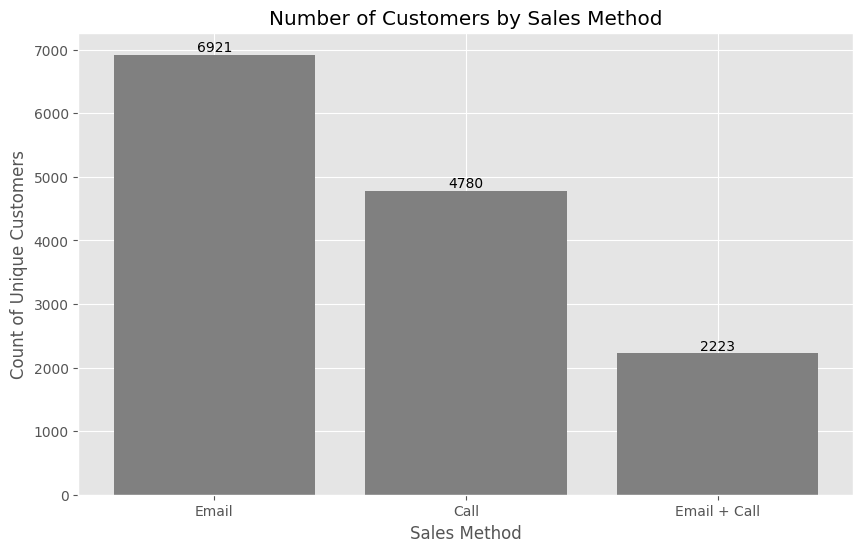

In [34]:
import matplotlib.pyplot as plt

# Group the data by 'sales_method' and count the unique 'customer_id' values
grouped = df.groupby('sales_method')['customer_id'].nunique().sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')
plt.figure(figsize=(10,6));
sns.set_palette(['gray']);

# Create the figure and axes with specified figsize
fig, ax = plt.subplots(figsize=(10, 6));

# Label each bar with their respective numbers
for i, value in enumerate(grouped.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Plot the bar chart with gray bars
ax.bar(grouped.index, grouped.values, color='gray')  # Fixed the error by providing the color directly

# Set labels and title
ax.set_xlabel('Sales Method')
ax.set_ylabel('Count of Unique Customers')
ax.set_title('Number of Customers by Sales Method')

# Display the chart
plt.show();

### Distribution of Customers by Sales Method

We could see that The Email approach reached the majority of 45.17% with 6922 customers, followed by Call aproach 31.14% with 4781, and the Email + Call approaches 23.69% with 2223, these makes the total number of 13926 customers.

### The Spread of the Revenue

Looking at the distribution of the revenue we can see from the graph that most single products sold had amount less than 200 USD, and the largest number of products sold are within the amount of 45 and 100 USD. The distribution of the revenue is right skewed. There are some sold more than 220 USD and above could be considered outliers.

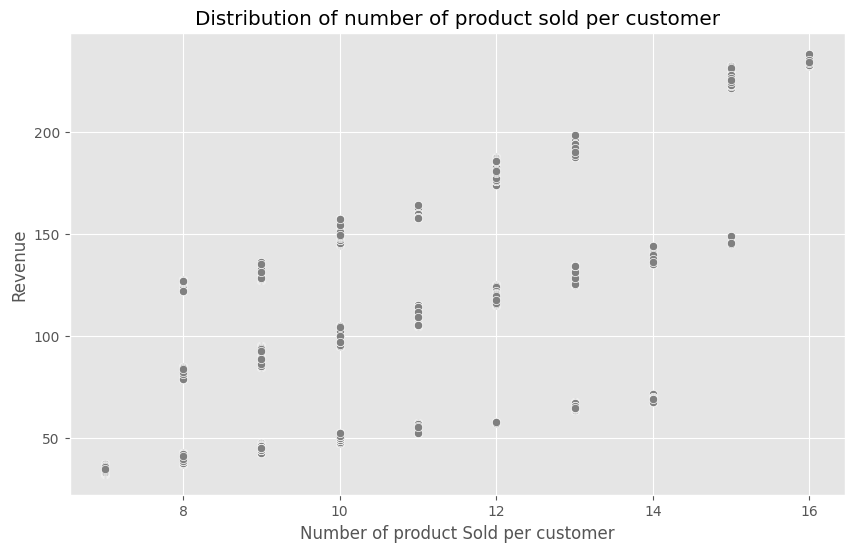

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='nb_sold', y='revenue')
plt.ylabel('Revenue')
plt.xlabel('Number of product Sold per customer')
plt.title('Distribution of number of product sold per customer')
plt.show()

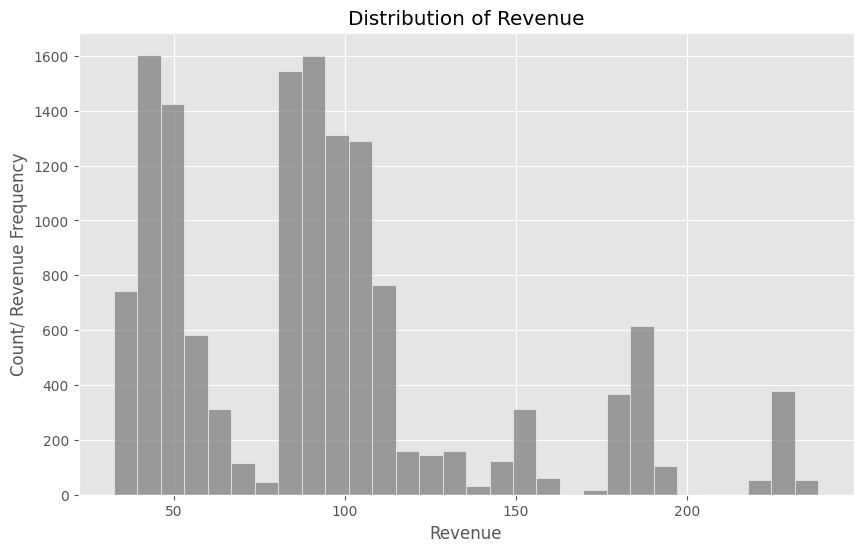

In [28]:
import seaborn as sns
plt.figure(figsize=(10,6))
# Plotting the histogram using seaborn
sns.histplot(data=df, x='revenue', bins=30)

# Adding labels and title
plt.xlabel('Revenue')
plt.ylabel('Count/ Revenue Frequency')
plt.title('Distribution of Revenue')

# Displaying the histogram
plt.show()

### Corrolation of Revenue and Product sold

Revenue and product sold are positively correlated

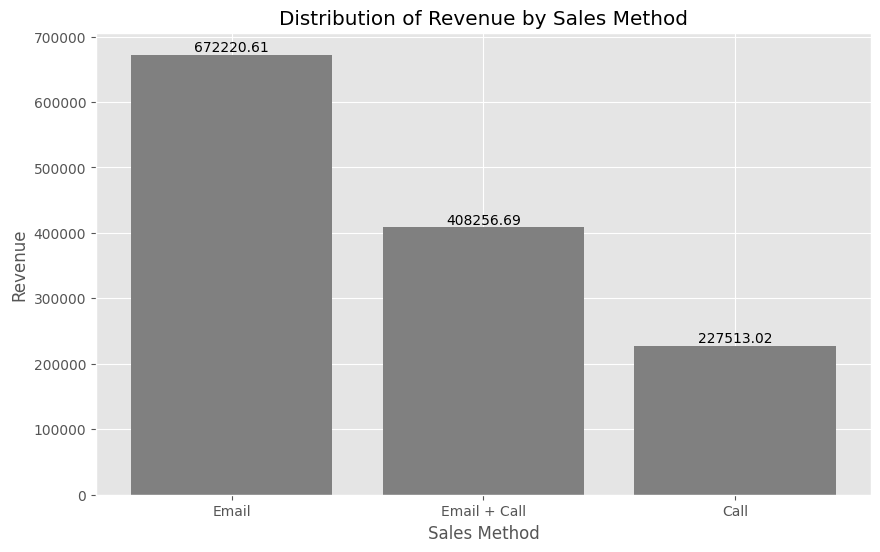

In [29]:
import matplotlib.pyplot as plt

# Group the data by 'sales_method' and sum the 'revenue' values
grouped = df.groupby('sales_method')['revenue'].sum().sort_values(ascending=False)

# Set the gray color for bars and grid lines
bar_color = 'gray'
grid_color = 'lightgray'

# Create the figure and axes with specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Label each bar with their respective numbers
for i, value in enumerate(grouped.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Plot the bar chart with gray bars
ax.bar(grouped.index, grouped.values, color=bar_color)

# Set labels and title
ax.set_xlabel('Sales Method')
ax.set_ylabel('Revenue')
ax.set_title('Distribution of Revenue by Sales Method')

# Display the chart
plt.show()

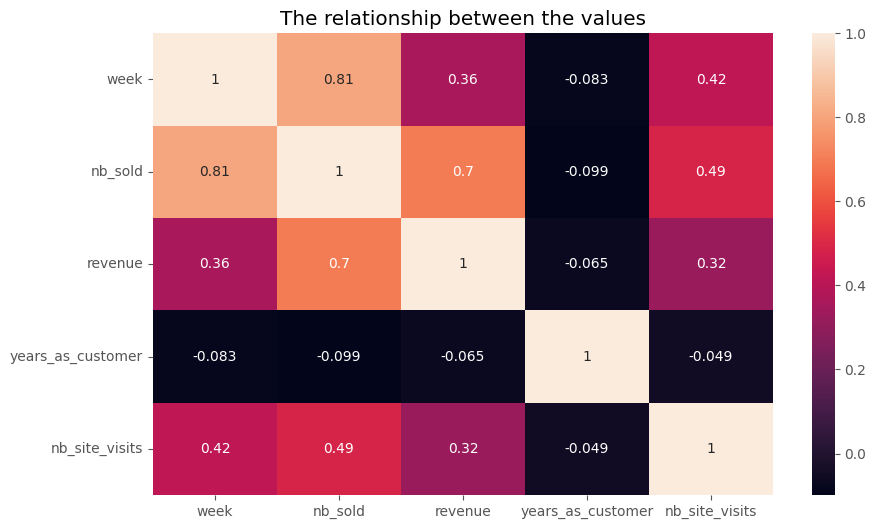

In [30]:
# Create the figure and axes with specified figsize
plt.figure(figsize=(10, 6));

#H eatmap plot to showcase the overal relationship
sns.heatmap(df.corr(),annot=True);
plt.title('The relationship between the values');

### Distribution of Revenue by Sales Method

The chart below shows the overal spread of the revenue for each method. The Email method had the highest revenue with 50.53%, followed by Email + Call with 30.71%, and Call with 18.76%.

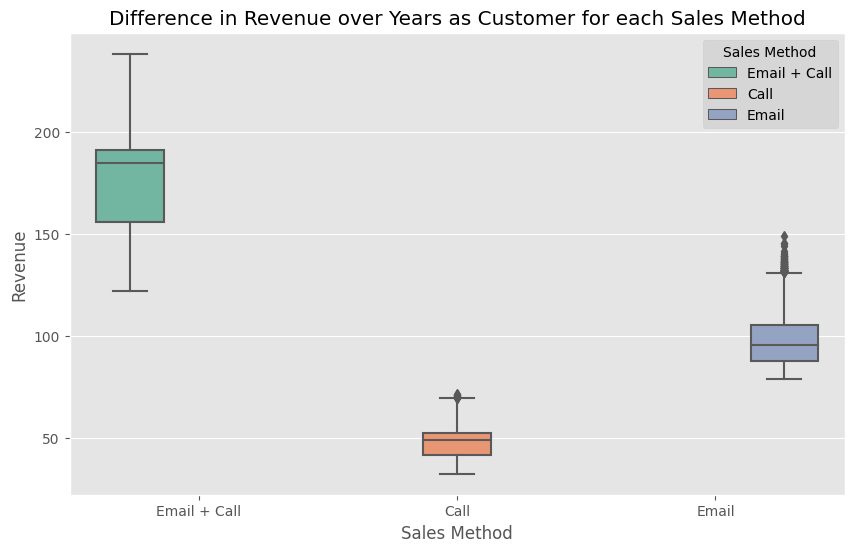

In [31]:
# Create the figure and axes with specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot to visualize the difference in 'revenue' over 'years_as_customer' for each 'sales_method'
sns.boxplot(x='sales_method', y='revenue', hue='sales_method', data=df, palette='Set2');
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Difference in Revenue over Years as Customer for each Sales Method')

# Display the plot
plt.legend(title='Sales Method', facecolor='lightgray')
plt.show()

### Difference in Revenue over Years as Customer for each Sales Method

The difference indicates the approach of Email + Call method generated revenue within the range of 140 to 205 per sale on some of the top products and the Years of customers patronage is between 0 and 39 years.

Also, combining the use of both Email and Call as sales methods tends to produce a quicker and effective result compared to Email or Call.

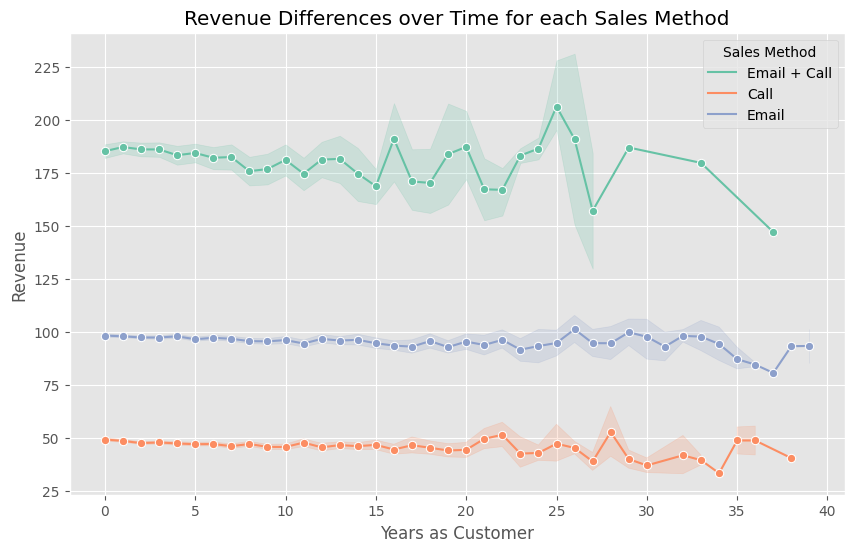

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes with specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot with markers
sns.lineplot(x='years_as_customer', y='revenue', hue='sales_method', data=df, marker='o', palette='Set2')

# Set the labels and title of the plot
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.title('Revenue Differences over Time for each Sales Method')

# Adjust the legend position
plt.legend(title='Sales Method', loc='upper right')

# Display the plot
plt.show()

### Revenue Differences over Time for each Sales Method


With just 2223 customers Email + Call generated 30.71% of the overal revenue comapared to other method with higher numbers of customers.

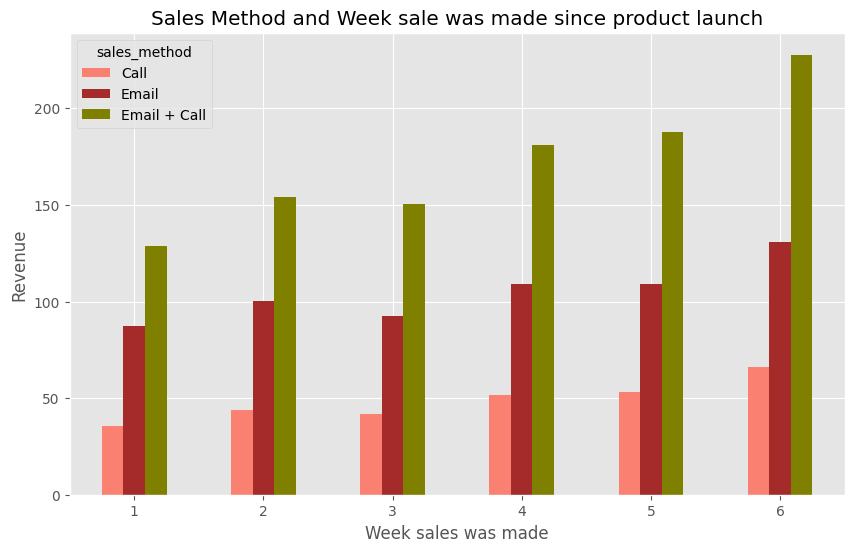

In [33]:
# Pivot the data to create a DataFrame with 'years_as_customer' as index, 'sales_method' as columns, and 'revenue' as values
pivot_df = df.pivot_table(index='week', columns='sales_method', values='revenue')

# Create the figure and axes with specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Create a grouped bar chart to visualize the revenue difference between sales methods over time
pivot_df.plot(kind='bar', color=['salmon', 'brown', 'olive'], ax=ax)
plt.xlabel('Week sales was made')
plt.ylabel('Revenue')
plt.title('Sales Method and Week sale was made since product launch')
# Rotate the x-axis labels horizontally
plt.xticks(rotation='horizontal')

# Display the plot
plt.show()

### Sales Method and Week sale was made since product launch


The chart below depicts the revenue spread across the sales methods over a 6-week period post-product launch. Email + Call consistently shows productive and consistent performance throughout the weeks.

# The Business Metrics

Since every business goal is selling products that helps customers and in returns increace the business revenue.


I would recommend the **the percentage of Email and Call Approach on total number of customers of the last 6 weeks sales to implement Email + Call as our metric**.

Based on our last 6 weeks product launched data, 45% sales was from Email approach and 31% from Call approch.

Therefore, if Email + Call method is implemented as our metric, and this number is increasing next 6 weeks, it indicates a very good sign to achieve our goal.

# Recommendation
For the following 6 weeks, I would recommend the company can focus on the following steps:

- Using key metrics to monitor can provide insights into the likelihood of sales growth.
- To implement an **Email** marketing campaign using customer segmentation, automation, and analytics to deliver targeted emails, track engagement metrics, and optimize **Email** performance.

- To effectively implement the **Call** approach within a call center setting for customer follow-ups regarding product inquiries and interests.
- To implement a CRM system if it's not already inplace, to enable us build and maintain strong customer relationships and improve customer experience.
- Data Collection for in-depth analysis:
    - Improve data quality - how much time was spent on each customer?
    - New related data - Date product was sold, delivery date,  and other time stamp.